## Example of numeric regression with a MLP

Numeric regression of a quadratic function.

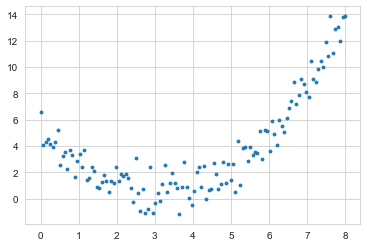

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

# Creating data points
N = 126 # number of points
min_x = 0
max_x = 8
a = 0.5            # function coefficient
x_v = 3            # x component of the parabola's vertix
b = -(x_v * 2 * a) # function coefficient
c = 5              # function coefficient

x = np.linspace(min_x, max_x, N)
noise = np.random.randn(N)
y = x**2 * a + x * b + c + noise

# Visualizando dados
plt.scatter(x, y, s=8)

In [2]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        # store the inputs and outputs
        self.X = x
        self.y = y
        # ensure data is float
        self.X = self.X.astype('float32')
        self.y = self.y.astype('float32')
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [18]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

ds = MyDataset(x_train, y_train)
dl = torch.utils.data.DataLoader(ds, batch_size=16, shuffle=True)

In [15]:
import torch.nn as nn
from torch.nn.init import xavier_uniform_

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = nn.Linear(input_dim, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = nn.Sigmoid()
        # second hidden layer
        self.hidden2 = nn.Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = nn.Sigmoid()
        # third hidden layer and output
        self.hidden3 = nn.Linear(8, output_dim)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, x):
        # input to first hidden layer
        X = self.hidden1(x)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X


In [19]:
from torch.autograd import Variable

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
model = MLP(input_dim, output_dim)

# define the loss fucntion and the optimization method
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# enumerate epochs
for epoch in range(100):
    # enumerate mini batches
    for i, (inputs, targets) in enumerate(dl):
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat, targets)
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()
    if epoch % 10 == 0:
        print("Loss: ", loss)


Loss:  tensor(10.4839, grad_fn=<MseLossBackward>)
Loss:  tensor(14.8010, grad_fn=<MseLossBackward>)
Loss:  tensor(4.4856, grad_fn=<MseLossBackward>)
Loss:  tensor(3.5429, grad_fn=<MseLossBackward>)
Loss:  tensor(1.3348, grad_fn=<MseLossBackward>)
Loss:  tensor(4.7245, grad_fn=<MseLossBackward>)
Loss:  tensor(4.9538, grad_fn=<MseLossBackward>)
Loss:  tensor(2.0179, grad_fn=<MseLossBackward>)
Loss:  tensor(1.0711, grad_fn=<MseLossBackward>)
Loss:  tensor(3.3229, grad_fn=<MseLossBackward>)


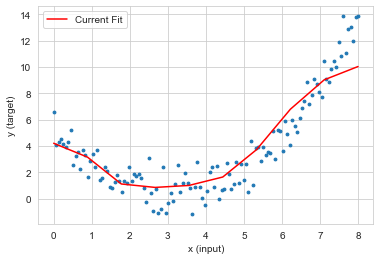

In [21]:
def plot_current_fit(model):
    plt.figure()
    plt.scatter(x, y, s = 8)
    x_line = np.linspace(min_x, max_x, 10).reshape(-1, 1).astype('float32')
    y_line = model(torch.from_numpy(x_line)).detach().numpy()
    
    plt.plot(x_line, y_line, 'r', label = 'Current Fit')
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()

plot_current_fit(model=model)

Fontes:
- https://fleuret.org/dlc/
- https://www.tutorialspoint.com/pytorch/index.htm
- https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd/
- https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
- https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/